In [338]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import xgboost as xgb
import catboost
from catboost import CatBoostClassifier, Pool
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from PIL import Image
import mlflow
import mlflow.sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
import optuna

import joblib
import json

import matplotlib.pyplot as plt
import seaborn as sns

from mlflow import MlflowClient
import requests

## Table of content
- 1. [COVID-19](#1-covid-19-dataset-)
- 2. [23_end](#pipeline)

<a id=COVID-19 Dataset></a>

## 1. COVID-19 Dataset 



#### COVID-19 patient's symptoms, status, and medical history.

#### About Dataset

This dataset is taken from Kaggle platform (https://www.kaggle.com/datasets/meirnizri/covid19-dataset)  


##### Context  

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

##### content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [299]:
data = pd.read_csv('data/Covid_data.csv')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [301]:
# temp - DELETE
data = data.iloc[0:1000]
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,3,2,2,14/06/2020,2,1,52,97,1,...,2,2,1,2,2,2,2,2,3,2
996,1,3,2,2,14/06/2020,1,1,70,97,1,...,2,2,1,2,2,1,2,1,3,1
997,1,3,2,2,14/06/2020,2,1,52,97,2,...,2,2,2,2,2,2,2,2,3,2
998,1,3,1,2,14/06/2020,1,1,50,2,1,...,2,2,1,2,2,2,2,2,6,1


In [302]:
missing_values_count = data.apply(lambda col: col.isin([97, 99]).sum())
missing_values_count

USMER                     0
MEDICAL_UNIT              0
SEX                       0
PATIENT_TYPE              0
DATE_DIED                 0
INTUBED                 334
PNEUMONIA                20
AGE                       0
PREGNANT                567
DIABETES                  0
COPD                      0
ASTHMA                    0
INMSUPR                   0
HIPERTENSION              0
OTHER_DISEASE             0
CARDIOVASCULAR            0
OBESITY                   0
RENAL_CHRONIC             0
TOBACCO                   0
CLASIFFICATION_FINAL      0
ICU                     334
dtype: int64

In [303]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

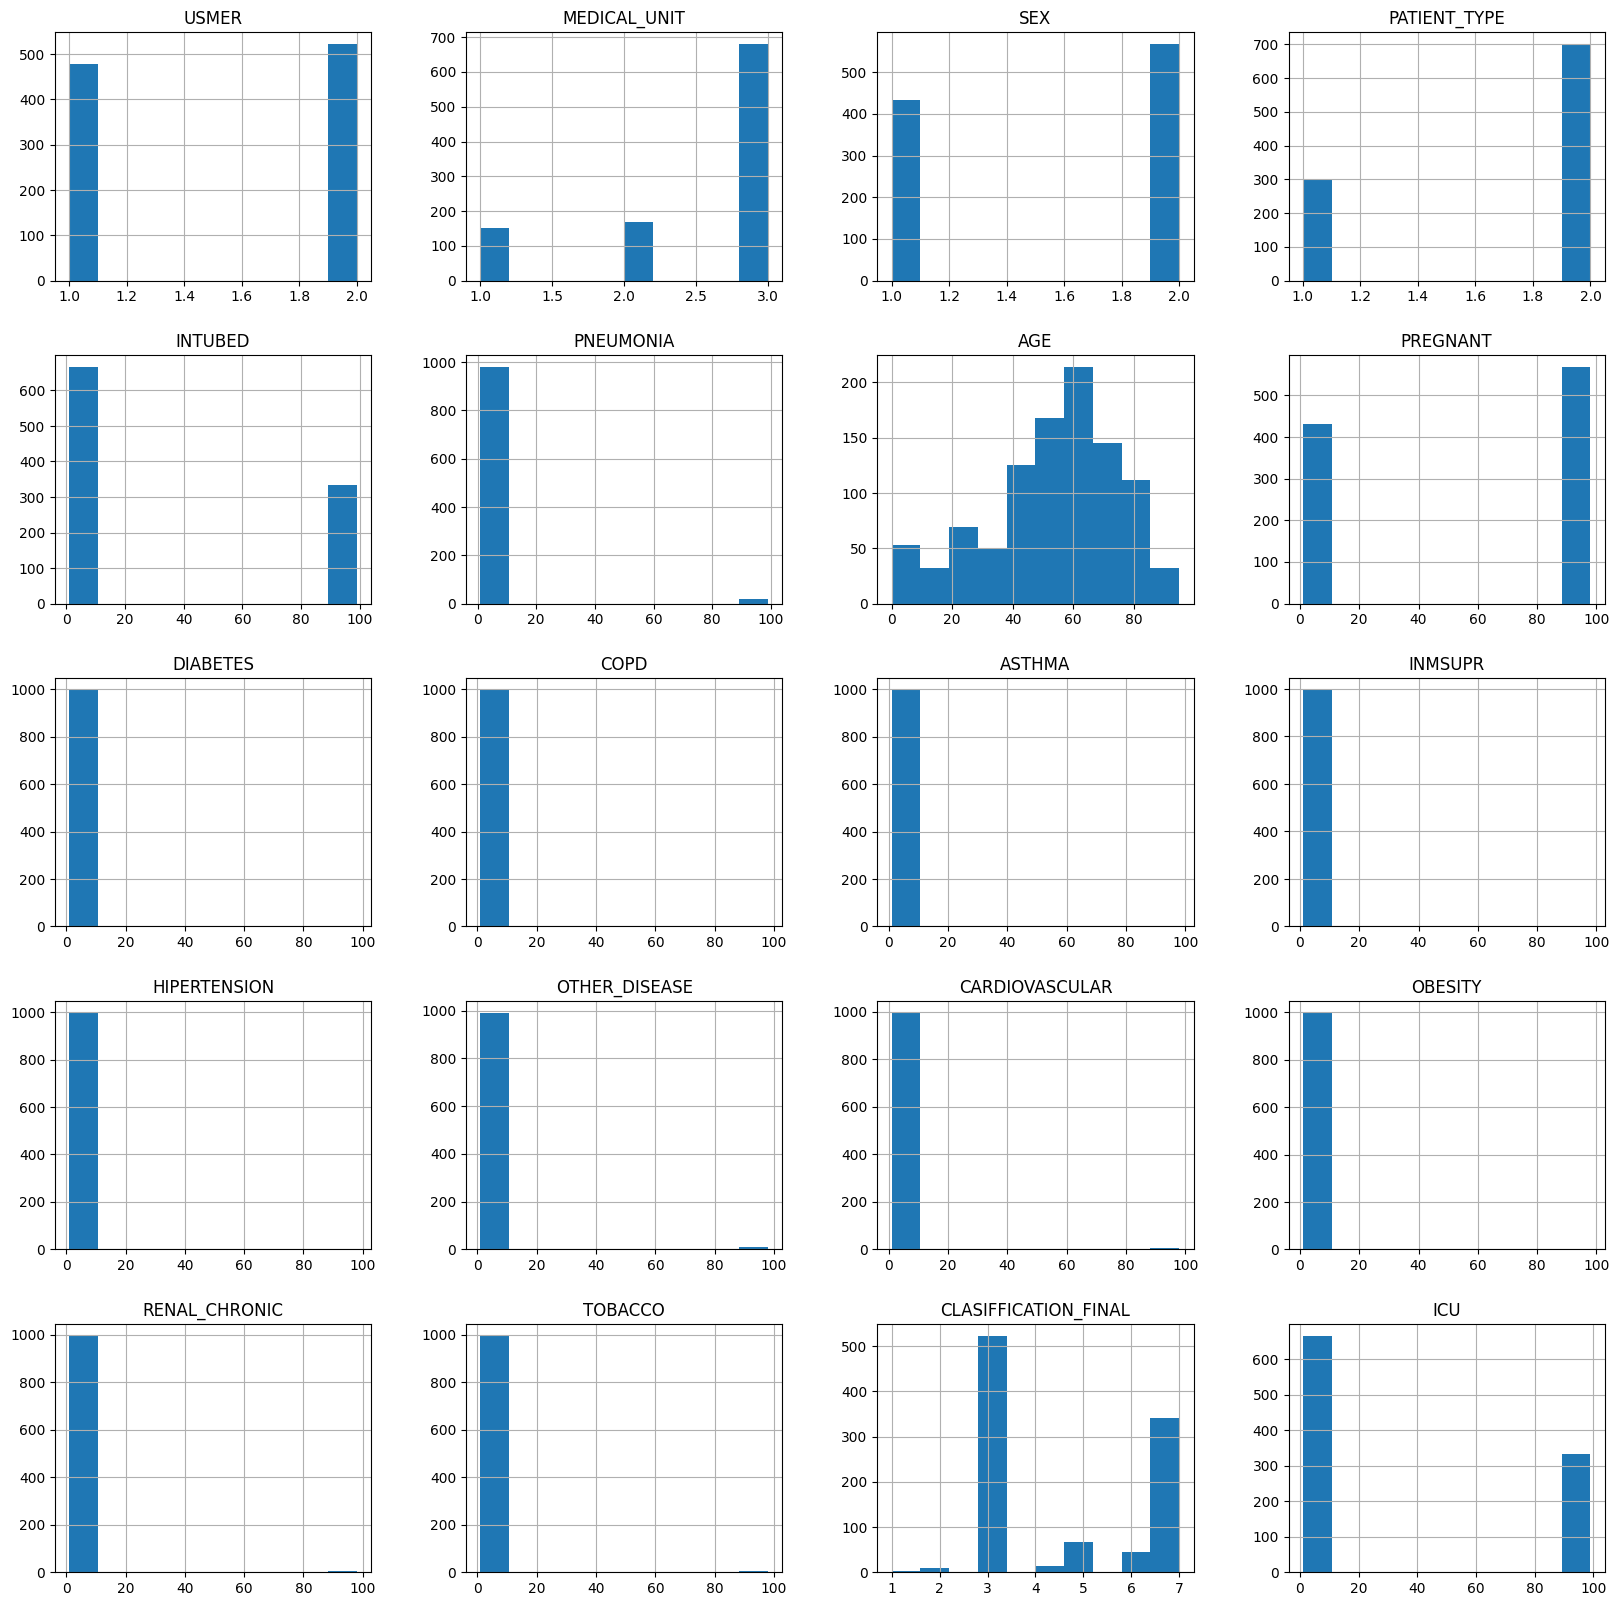

In [279]:
data.hist(figsize=(20, 20));

## 2. Pipeline

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 1000 non-null   int64 
 1   MEDICAL_UNIT          1000 non-null   int64 
 2   SEX                   1000 non-null   int64 
 3   PATIENT_TYPE          1000 non-null   int64 
 4   DATE_DIED             1000 non-null   object
 5   INTUBED               1000 non-null   int64 
 6   PNEUMONIA             1000 non-null   int64 
 7   AGE                   1000 non-null   int64 
 8   PREGNANT              1000 non-null   int64 
 9   DIABETES              1000 non-null   int64 
 10  COPD                  1000 non-null   int64 
 11  ASTHMA                1000 non-null   int64 
 12  INMSUPR               1000 non-null   int64 
 13  HIPERTENSION          1000 non-null   int64 
 14  OTHER_DISEASE         1000 non-null   int64 
 15  CARDIOVASCULAR        1000 non-null   i

In [304]:
# let's make this classification task

data.loc[~data['DATE_DIED'].isin(['9999-99-99']), 'DATE_DIED'] = 1 #checks if the  column is not in the list ['9999-99-99'].
data.loc[data['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = 0


In [305]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,1,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,1,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,1,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,3,2,2,1,2,1,52,97,1,...,2,2,1,2,2,2,2,2,3,2
996,1,3,2,2,1,1,1,70,97,1,...,2,2,1,2,2,1,2,1,3,1
997,1,3,2,2,1,2,1,52,97,2,...,2,2,2,2,2,2,2,2,3,2
998,1,3,1,2,1,1,1,50,2,1,...,2,2,1,2,2,2,2,2,6,1


In [306]:
X = data.drop('DATE_DIED',axis=1)
y = data['DATE_DIED']

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,train_size=0.7, random_state=13)


In [308]:
X_train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
667,2,3,1,1,97,2,48,2,1,2,2,2,1,2,2,2,2,2,3,97
350,2,3,1,2,1,1,63,2,1,2,2,2,1,2,1,2,1,2,7,2
283,2,2,2,1,97,2,95,97,2,2,2,2,2,2,2,2,2,2,7,97
608,1,3,2,2,2,1,40,97,2,2,2,2,2,2,2,2,2,2,5,2
347,2,3,1,2,2,1,72,2,2,2,2,2,2,2,2,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,2,1,2,2,2,12,2,2,2,2,1,2,2,2,2,2,2,3,2
871,1,3,1,2,1,1,43,2,1,2,2,2,2,2,2,2,2,2,3,1
569,1,3,2,2,1,1,77,97,1,2,2,2,1,2,2,2,2,2,3,1
54,2,1,1,1,97,2,62,2,2,2,2,2,1,2,2,1,2,1,7,97


### Pipeline

In [309]:
numerical_features = ['AGE']

categorical_features = [i for i in X_train.columns if i not in numerical_features]

# numeric data pipeline
pipe_num = Pipeline([
    # ('imputer', SimpleImputer(strategy='median')), # not necessary because we have already clean data 
    ('power_tr', PowerTransformer()),
    ('scaler', StandardScaler()) ])

# cat data pipeline
pipe_cat = Pipeline([
    # ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')), # not necessary because we have already clean data 
    ('encoding', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) ])

# column transformer
ct = ColumnTransformer([
    ('pipe_num', pipe_num, numerical_features),
    ('pipe_cat', pipe_cat, categorical_features) ])

## 3. Model training

### 3.1 XGBoost model
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [310]:
#full pipeline with XGBoost
pipe = Pipeline([
    ('column_transformer', ct),
    ('model', xgb.XGBClassifier()),  # It denotes the fraction of observations to be randomly samples for each tree. 
])


In [211]:
mlflow.set_tracking_uri(uri='http://127.0.0.1:5000')
client = MlflowClient()
local_dir = ('C:/Users/Peter/DataspellProjects/pollock')


In [312]:
# optimize hyperparameters with Optuna
def objective(trial):

    # params for optimization
    params = {
        'model__eta': trial.suggest_float('model__eta', 0.01, 0.2),
        'model__gamma': trial.suggest_float('model__gamma', 0.01, 5),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 10),
        'model__min_child_weight': trial.suggest_float('model__min_child_weight', 1, 10),
        'model__max_delta_step': trial.suggest_float('model__max_delta_step', 0.001, 10),
        'model__subsample': trial.suggest_float('model__subsample', 0.1, 1),
        'model__colsample_bytree': trial.suggest_float('model__colsample_bytree', 0.5, 1),
        'model__colsample_bylevel': trial.suggest_float('model__colsample_bylevel', 0.5, 1),
        'model__colsample_bynode': trial.suggest_float('model__colsample_bynode', 0.5, 1),
        'model__reg_lambda': trial.suggest_float('model__reg_lambda', 1e-5, 1e2),
        'model__reg_alpha': trial.suggest_float('model__reg_alpha', 1e-5, 1e2),
        'model__scale_pos_weight': trial.suggest_float('model__scale_pos_weight', 1, 10),
        'model__max_leaves': trial.suggest_int('model__max_leaves', 1, 100),
    }

    pipe.set_params(**params)

    # model fitting
    cross_val_f1 = cross_val_score(pipe, X_train, list(y_train), scoring='f1').mean()

    return cross_val_f1  # Use F1 score for binary classification


mlflow.set_experiment("MLflow_hype_optuna_XGB")

with mlflow.start_run(run_name='xgb_optuna_run'):
    study = optuna.create_study(direction='maximize')  # Maximize F1 score
    study.optimize(objective, n_trials=10)

    best_trial = study.best_trial
    best_params = best_trial.params

    # Log parameters
    mlflow.log_params(best_params)

    # Set the best parameters to your model
    pipe.set_params(**best_params)

    # Train the model with the best parameters on the entire training set
    pipe.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipe.predict(X_test)


# Metrics
    accuracy = accuracy_score(list(y_test), y_pred)
    recall = recall_score(list(y_test), y_pred)
    f1 = f1_score(list(y_test), y_pred)

    mlflow.sklearn.log_model(pipe, 'xgb_model_optuna')

    # Log metrics
    mlflow.log_metrics({
        'accuracy': accuracy,
        'recall': recall,
        'f1_score': f1,
    })

    # Calculate ROC AUC (if needed for binary classification)
    fpr, tpr, thresholds = roc_curve(list(y_test), y_pred)
    roc_auc = roc_auc_score(list(y_test), y_pred)

    # Plot ROC curve (if needed for binary classification)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save the plot to a local file
    roc_auc_plot_path = "mlruns/roc_auc_plot.png"
    plt.savefig(roc_auc_plot_path)
    plt.close()

    # Log ROC AUC plot as an artifact (if needed for binary classification)
    mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")


[I 2024-01-10 21:19:55,711] A new study created in memory with name: no-name-b94175cd-5d84-4690-8e83-7548da11db03
[I 2024-01-10 21:19:57,374] Trial 0 finished with value: 0.8165629693198884 and parameters: {'model__eta': 0.059187476438586316, 'model__gamma': 3.7208372643722374, 'model__max_depth': 4, 'model__min_child_weight': 6.93306213127835, 'model__max_delta_step': 4.494891135333226, 'model__subsample': 0.6678909168167165, 'model__colsample_bytree': 0.6242688648771846, 'model__colsample_bylevel': 0.8520524454207213, 'model__colsample_bynode': 0.7552115120027838, 'model__reg_lambda': 56.13176677444591, 'model__reg_alpha': 73.11837808782644, 'model__scale_pos_weight': 8.655200927702545, 'model__max_leaves': 91}. Best is trial 0 with value: 0.8165629693198884.
[I 2024-01-10 21:19:57,947] Trial 1 finished with value: 0.8376089241805882 and parameters: {'model__eta': 0.08782734805472288, 'model__gamma': 4.212380491797424, 'model__max_depth': 9, 'model__min_child_weight': 6.1640820451894

In [256]:
logged_model_xgb = 'runs:/38d9fc155e7f4dc3b5e1cdce89a95577/xgb_model_optuna'

# Load model as a PyFuncModel.
loaded_model_xgb = mlflow.pyfunc.load_model(logged_model_xgb)

In [257]:
joblib.dump(loaded_model_xgb,'xgb_optuna_model.joblib')

['xgb_optuna_model.joblib']

### 3.2 CatBoost model
Catboost is a boosted decision tree machine learning algorithm developed by Yandex. It works in the same way as other gradient boosted algorithms such as XGBoost but provides support out of the box for categorical variables, has a higher level of accuracy without tuning parameters and also offers GPU support to speed up training.


In [313]:
# Full pipeline with CatBoost
cat_pipe = Pipeline([
    ('column_transformer', ct),
    ('model', CatBoostClassifier()),  # Use CatBoostClassifier
])

In [314]:
# Optimize hyperparameters with Optuna
def objective(trial):

    # Parameters for optimization
    cat_params = {
        'model__learning_rate': trial.suggest_float('model__learning_rate', 0.01, 0.2),
        'model__depth': trial.suggest_int('model__depth', 3, 10),
        'model__l2_leaf_reg': trial.suggest_float('model__l2_leaf_reg', 1, 10),
        'model__subsample': trial.suggest_float('model__subsample', 0.1, 1),
        'model__colsample_bylevel': trial.suggest_float('model__colsample_bylevel', 0.5, 1),
        'model__scale_pos_weight': trial.suggest_float('model__scale_pos_weight', 1, 10),
    }

    cat_pipe.set_params(**cat_params)

    # Model fitting
    cross_val_f1 = cross_val_score(cat_pipe, X_train, list(y_train), scoring='f1').mean()

    return cross_val_f1  # Use F1 score for binary classification

mlflow.set_experiment("MLflow_hype_optuna_CatBoost")

with mlflow.start_run(run_name='catboost_optuna_run'):
    cat_study = optuna.create_study(direction='maximize')  # Maximize F1 score
    cat_study.optimize(objective, n_trials=1)

    best_cat_trial = cat_study.best_trial
    best_cat_params = best_cat_trial.params

    # Log parameters
    mlflow.log_params(best_cat_params)

    # Set the best parameters to your CatBoost model
    cat_pipe.set_params(**best_cat_params)

    # Train the model with the best parameters on the entire training set
    cat_pipe.fit(X_train, y_train)

    # Make predictions on the test set
    y_cat_pred = cat_pipe.predict(X_test)

    # Metrics
    accuracy_cat = accuracy_score(list(y_test), y_cat_pred)
    recall_cat = recall_score(list(y_test), y_cat_pred)
    f1_cat = f1_score(list(y_test), y_cat_pred)

    mlflow.sklearn.log_model(cat_pipe, 'catboost_model_optuna')

    # Log metrics
    mlflow.log_metrics({
        'accuracy': accuracy_cat,
        'recall': recall_cat,
        'f1_score': f1_cat,
    })

    # Calculate ROC AUC (if needed for binary classification)
    fpr_cat, tpr_cat, thresholds_cat = roc_curve(list(y_test), y_cat_pred)
    roc_auc_cat = roc_auc_score(list(y_test), y_cat_pred)

    # Plot ROC curve (if needed for binary classification)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_cat, tpr_cat, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cat))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save the plot to a local file
    roc_auc_cat_plot_path = "mlruns/roc_auc_cat_plot.png"
    plt.savefig(roc_auc_cat_plot_path)
    plt.close()

    # Log ROC AUC plot as an artifact (if needed for binary classification)
    mlflow.log_artifact(roc_auc_cat_plot_path, "roc_auc_cat_plot")

[I 2024-01-10 21:22:05,263] A new study created in memory with name: no-name-ea169a06-329c-44bf-8437-4eb53a713f45


0:	learn: 0.4706741	total: 2.67ms	remaining: 2.66s
1:	learn: 0.3336083	total: 5.37ms	remaining: 2.68s
2:	learn: 0.2381431	total: 7.57ms	remaining: 2.51s
3:	learn: 0.1811599	total: 10.1ms	remaining: 2.52s
4:	learn: 0.1431415	total: 12.6ms	remaining: 2.52s
5:	learn: 0.1168251	total: 14.9ms	remaining: 2.47s
6:	learn: 0.0925258	total: 17.5ms	remaining: 2.48s
7:	learn: 0.0779363	total: 22.3ms	remaining: 2.77s
8:	learn: 0.0657788	total: 24.4ms	remaining: 2.68s
9:	learn: 0.0593151	total: 26.7ms	remaining: 2.65s
10:	learn: 0.0522418	total: 29.7ms	remaining: 2.67s
11:	learn: 0.0468169	total: 32.2ms	remaining: 2.65s
12:	learn: 0.0416353	total: 34.8ms	remaining: 2.64s
13:	learn: 0.0381848	total: 37.6ms	remaining: 2.65s
14:	learn: 0.0353953	total: 40.1ms	remaining: 2.63s
15:	learn: 0.0326936	total: 42.8ms	remaining: 2.63s
16:	learn: 0.0312247	total: 45.2ms	remaining: 2.61s
17:	learn: 0.0297937	total: 47.4ms	remaining: 2.59s
18:	learn: 0.0278345	total: 49.7ms	remaining: 2.57s
19:	learn: 0.0265449	t

[I 2024-01-10 21:22:17,764] Trial 0 finished with value: 0.9926919155612222 and parameters: {'model__learning_rate': 0.11768461988508078, 'model__depth': 6, 'model__l2_leaf_reg': 8.943733637523295, 'model__subsample': 0.4683372430362339, 'model__colsample_bylevel': 0.6004879181166791, 'model__scale_pos_weight': 2.6856546748901646}. Best is trial 0 with value: 0.9926919155612222.


964:	learn: 0.0014656	total: 2.15s	remaining: 78.2ms
965:	learn: 0.0014655	total: 2.16s	remaining: 75.9ms
966:	learn: 0.0014655	total: 2.16s	remaining: 73.7ms
967:	learn: 0.0014655	total: 2.16s	remaining: 71.5ms
968:	learn: 0.0014654	total: 2.17s	remaining: 69.3ms
969:	learn: 0.0014654	total: 2.17s	remaining: 67.1ms
970:	learn: 0.0014654	total: 2.17s	remaining: 64.8ms
971:	learn: 0.0014654	total: 2.17s	remaining: 62.6ms
972:	learn: 0.0014654	total: 2.17s	remaining: 60.4ms
973:	learn: 0.0014586	total: 2.18s	remaining: 58.2ms
974:	learn: 0.0014585	total: 2.18s	remaining: 55.9ms
975:	learn: 0.0014569	total: 2.18s	remaining: 53.7ms
976:	learn: 0.0014569	total: 2.19s	remaining: 51.5ms
977:	learn: 0.0014499	total: 2.19s	remaining: 49.3ms
978:	learn: 0.0014499	total: 2.19s	remaining: 47ms
979:	learn: 0.0014499	total: 2.19s	remaining: 44.8ms
980:	learn: 0.0014498	total: 2.2s	remaining: 42.6ms
981:	learn: 0.0014498	total: 2.2s	remaining: 40.3ms
982:	learn: 0.0014496	total: 2.2s	remaining: 38.1m

C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [315]:
logged_model_catb = 'runs:/99549db16c9b4884b06402a72fc1809f/catboost_model_optuna'

# Load model as a PyFuncModel.
loaded_model_catb = mlflow.pyfunc.load_model(logged_model_catb)

In [316]:
joblib.dump(loaded_model_catb,'catb_optuna_model.joblib')

['catb_optuna_model.joblib']

### 3.3 LightGBM model
Light GBM is a gradient boosting framework that uses tree based learning algorithm.

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

In [324]:
model_trained = lgbm_pipe.fit(X_train, list(y_train))


[LightGBM] [Info] Number of positive: 483, number of negative: 217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.690000 -> initscore=0.800119
[LightGBM] [Info] Start training from score 0.800119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [325]:
# Full pipeline with LightGBM
lgbm_pipe = Pipeline([
    ('column_transformer', ct),
    ('model', LGBMClassifier()),  # Use LGBMClassifier
])

# Optimize hyperparameters with Optuna
def objective(trial):

    # Parameters for optimization
    lgbm_params = {
        'model__learning_rate': trial.suggest_float('model__learning_rate', 0.01, 0.2),
        'model__num_leaves': trial.suggest_int('model__num_leaves', 10, 200),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 20),
        'model__min_child_samples': trial.suggest_int('model__min_child_samples', 1, 20),
        'model__subsample': trial.suggest_float('model__subsample', 0.1, 1),
        'model__colsample_bytree': trial.suggest_float('model__colsample_bytree', 0.5, 1),
        'model__reg_lambda': trial.suggest_float('model__reg_lambda', 1e-5, 1e2),
        'model__reg_alpha': trial.suggest_float('model__reg_alpha', 1e-5, 1e2),
        'model__scale_pos_weight': trial.suggest_float('model__scale_pos_weight', 1, 10),
    }

    lgbm_pipe.set_params(**lgbm_params)

    # Model fitting
    cross_val_f1 = cross_val_score(lgbm_pipe, X_train, list(y_train), scoring='f1').mean()

    return cross_val_f1  # Use F1 score for binary classification

mlflow.set_experiment("MLflow_hype_optuna_LightGBM")

with mlflow.start_run(run_name='lgbm_optuna_run'):
    lgbm_study = optuna.create_study(direction='maximize')  # Maximize F1 score
    lgbm_study.optimize(objective, n_trials=1)

    best_lgbm_trial = lgbm_study.best_trial
    best_lgbm_params = best_lgbm_trial.params

    # Log parameters
    mlflow.log_params(best_lgbm_params)

    # Set the best parameters to your LightGBM model
    lgbm_pipe.set_params(**best_lgbm_params)

    # Train the model with the best parameters on the entire training set
    lgbm_pipe.fit(X_train, list(y_train))

    # Make predictions on the test set
    y_lgbm_pred = lgbm_pipe.predict(X_test)

    # Metrics
    accuracy_lgbm = accuracy_score(list(y_test), y_lgbm_pred)
    recall_lgbm = recall_score(list(y_test), y_lgbm_pred)
    f1_lgbm = f1_score(list(y_test), y_lgbm_pred)

    mlflow.sklearn.log_model(lgbm_pipe, 'lgbm_model_optuna')

    # Log metrics
    mlflow.log_metrics({
        'accuracy': accuracy_lgbm,
        'recall': recall_lgbm,
        'f1_score': f1_lgbm,
    })

    # Calculate ROC AUC (if needed for binary classification)
    fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(list(y_test), y_lgbm_pred)
    roc_auc_lgbm = roc_auc_score(list(y_test), y_lgbm_pred)

    # Plot ROC curve (if needed for binary classification)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lgbm))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save the plot to a local file
    roc_auc_lgbm_plot_path = "mlruns/roc_auc_lgbm_plot.png"
    plt.savefig(roc_auc_lgbm_plot_path)
    plt.close()

    # Log ROC AUC plot as an artifact (if needed for binary classification)
    mlflow.log_artifact(roc_auc_lgbm_plot_path, "roc_auc_lgbm_plot")

[I 2024-01-10 21:33:31,834] A new study created in memory with name: no-name-0690732c-6130-4055-b006-605908379d31


[LightGBM] [Info] Number of positive: 386, number of negative: 174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689286 -> initscore=0.796782
[LightGBM] [Info] Start training from score 0.796782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[I 2024-01-10 21:33:32,094] Trial 0 finished with value: 0.9667466197034124 and parameters: {'model__learning_rate': 0.14153002830549713, 'model__num_leaves': 99, 'model__max_depth': 7, 'model__min_child_samples': 5, 'model__subsample': 0.8822803254187522, 'model__colsample_bytree': 0.8196991111082603, 'model__reg_lambda': 10.938781903434352, 'model__reg_alpha': 28.771194347918918, 'model__scale_pos_weight': 9.206340718141739}. Best is trial 0 with value: 0.9667466197034124.


[LightGBM] [Info] Number of positive: 387, number of negative: 173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691071 -> initscore=0.805133
[LightGBM] [Info] Start training from score 0.805133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [326]:
logged_model_lgbm = logged_model = 'runs:/ed7a2bb27af84058a418a7846ad0283a/lgbm_model_optuna'

# Load model as a PyFuncModel.
loaded_model_lgbm = mlflow.pyfunc.load_model(logged_model_lgbm)

In [327]:
joblib.dump(loaded_model_lgbm,'loaded_model_lgbm.joblib')


['loaded_model_lgbm.joblib']

### 3.4 K-Nearest Neighbors (K-NN) model

K-Nearest Neighbors is a simple and intuitive algorithm used for both classification and regression tasks. The basic idea is to classify or predict a new data point based on the majority class or average of its k-nearest neighbors in the feature space. The algorithm calculates the distance between data points to determine their proximity. The value of k, representing the number of neighbors, is a crucial parameter that influences the model's performance. K-NN is non-parametric, meaning it doesn't make assumptions about the underlying data distribution, making it versatile for different types of datasets.

In [328]:
# Full pipeline with k-Nearest Neighbors (KNN)
knn_pipe = Pipeline([
    ('column_transformer', ct),
    ('model', KNeighborsClassifier()),  # Use KNeighborsClassifier
])


In [329]:
# Optimize hyperparameters with Optuna
def objective(trial):

    # Parameters for optimization
    knn_params = {
        'model__n_neighbors': trial.suggest_int('model__n_neighbors', 1, 20),
        'model__weights': trial.suggest_categorical('model__weights', ['uniform', 'distance']),
        'model__p': trial.suggest_int('model__p', 1, 2),  # For Minkowski distance
    }

    knn_pipe.set_params(**knn_params)

    # Model fitting
    cross_val_f1 = cross_val_score(knn_pipe, X_train, list(y_train), scoring='f1').mean()

    return cross_val_f1  # Use F1 score for binary classification

mlflow.set_experiment("MLflow_hype_optuna_KNN")

with mlflow.start_run(run_name='knn_optuna_run'):
    knn_study = optuna.create_study(direction='maximize')  # Maximize F1 score
    knn_study.optimize(objective, n_trials=1)

    best_knn_trial = knn_study.best_trial
    best_knn_params = best_knn_trial.params

    # Log parameters
    mlflow.log_params(best_knn_params)

    # Set the best parameters to your KNN model
    knn_pipe.set_params(**best_knn_params)

    # Train the model with the best parameters on the entire training set
    knn_pipe.fit(X_train, list(y_train))

    # Make predictions on the test set
    y_knn_pred = knn_pipe.predict(X_test)

    # Metrics
    accuracy_knn = accuracy_score(list(y_test), y_knn_pred)
    recall_knn = recall_score(list(y_test), y_knn_pred)
    f1_knn = f1_score(list(y_test), y_knn_pred)

    mlflow.sklearn.log_model(knn_pipe, 'knn_model_optuna')

    # Log metrics
    mlflow.log_metrics({
        'accuracy': accuracy_knn,
        'recall': recall_knn,
        'f1_score': f1_knn,
    })

    # Calculate ROC AUC (if needed for binary classification)
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(list(y_test), y_knn_pred)
    roc_auc_knn = roc_auc_score(list(y_test), y_knn_pred)

    # Plot ROC curve (if needed for binary classification)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save the plot to a local file
    roc_auc_knn_plot_path = "mlruns/roc_auc_knn_plot.png"
    plt.savefig(roc_auc_knn_plot_path)
    plt.close()

    # Log ROC AUC plot as an artifact (if needed for binary classification)
    mlflow.log_artifact(roc_auc_knn_plot_path, "roc_auc_knn_plot")

[I 2024-01-10 21:35:26,686] A new study created in memory with name: no-name-d4048587-bf94-49a9-aa0f-d6337d02e8c1
[I 2024-01-10 21:35:26,994] Trial 0 finished with value: 0.9620258960830708 and parameters: {'model__n_neighbors': 14, 'model__weights': 'uniform', 'model__p': 2}. Best is trial 0 with value: 0.9620258960830708.
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is

In [330]:
logged_model_knn = 'runs:/2cb937454c6849959dd3f11300981261/knn_model_optuna'

# Load model as a PyFuncModel.
loaded_model_knn = mlflow.pyfunc.load_model(logged_model_knn)

In [331]:
joblib.dump(loaded_model_knn,'knn_optuna_model.joblib')


['knn_optuna_model.joblib']

### 3.5 Logistic Regression model

Logistic Regression is a statistical method used for binary and multi-class classification problems. Despite its name, it is a classification algorithm rather than a regression one. It predicts the probability of an instance belonging to a particular class, and then makes a discrete prediction based on a threshold.

In [335]:

# Full pipeline with Logistic Regression
logreg_pipe = Pipeline([
    ('column_transformer', ct),
    ('model', LogisticRegression()),  # Use Logistic Regression
])

# Optimize hyperparameters with Optuna
def objective(trial):

    # Parameters for optimization
    logreg_params = {
        'model__penalty': trial.suggest_categorical('model__penalty', ['none', 'l2']),
        'model__C': trial.suggest_float('model__C', 1e-5, 1e2),
        'model__fit_intercept': trial.suggest_categorical('model__fit_intercept', [True, False]),
    }

    logreg_pipe.set_params(**logreg_params)

    # Model fitting
    cross_val_f1 = cross_val_score(logreg_pipe, X_train, list(y_train), scoring='f1').mean()

    return cross_val_f1  # Use F1 score for binary classification

mlflow.set_experiment("MLflow_hype_optuna_LogisticRegression")

with mlflow.start_run(run_name='logreg_optuna_run'):
    logreg_study = optuna.create_study(direction='maximize')  # Maximize F1 score
    logreg_study.optimize(objective, n_trials=10)

    best_logreg_trial = logreg_study.best_trial
    best_logreg_params = best_logreg_trial.params

    # Log parameters
    mlflow.log_params(best_logreg_params)

    # Set the best parameters to your Logistic Regression model
    logreg_pipe.set_params(**best_logreg_params)

    # Train the model with the best parameters on the entire training set
    logreg_pipe.fit(X_train, list(y_train))

    # Make predictions on the test set
    y_logreg_pred = logreg_pipe.predict(X_test)

    # Metrics
    accuracy_logreg = accuracy_score(list(y_test), y_logreg_pred)
    recall_logreg = recall_score(list(y_test), y_logreg_pred)
    f1_logreg = f1_score(list(y_test), y_logreg_pred)

    mlflow.sklearn.log_model(logreg_pipe, 'logreg_model_optuna')

    # Log metrics
    mlflow.log_metrics({
        'accuracy': accuracy_logreg,
        'recall': recall_logreg,
        'f1_score': f1_logreg,
    })

    # Calculate ROC AUC (if needed for binary classification)
    fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(list(y_test), y_logreg_pred)
    roc_auc_logreg = roc_auc_score(list(y_test), y_logreg_pred)

    # Plot ROC curve (if needed for binary classification)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save the plot to a local file
    roc_auc_logreg_plot_path = "mlruns/roc_auc_logreg_plot.png"
    plt.savefig(roc_auc_logreg_plot_path)
    plt.close()

    # Log ROC AUC plot as an artifact (if needed for binary classification)
    mlflow.log_artifact(roc_auc_logreg_plot_path, "roc_auc_logreg_plot")


[I 2024-01-10 21:42:57,872] A new study created in memory with name: no-name-afb55c2e-6b90-42e7-b47e-c874eb8ac9fd
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\envs\kanagawa\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Program

In [336]:
logged_model_logreg = 'runs:/b2a4f5cce8d94a8f993cd5d4acae3ddd/logreg_model_optuna'

# Load model as a PyFuncModel.
loaded_model_logreg = mlflow.pyfunc.load_model(logged_model_logreg)

In [337]:
joblib.dump(loaded_model_logreg,'logreg_optuna_model.joblib')


['logreg_optuna_model.joblib']

### 3.7 Naive Bayes model

Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem, which calculates the probability of a hypothesis (class) given the observed evidence (features). The "naive" assumption in Naive Bayes is that all features are conditionally independent given the class. This simplifying assumption significantly reduces computational complexity, making it computationally efficient. Naive Bayes is computationally efficient due to the independence assumption, making it particularly useful for large datasets.

In [342]:


# Full pipeline with Gaussian Naive Bayes
nb_pipe = Pipeline([
    ('column_transformer', ct),
    ('model', GaussianNB()),  # Use Gaussian Naive Bayes
])

# Optimize hyperparameters with Optuna
def objective(trial):


    # Model fitting
    cross_val_f1 = cross_val_score(nb_pipe, X_train, list(y_train), scoring='f1').mean()

    return cross_val_f1  # Use F1 score for binary classification

mlflow.set_experiment("MLflow_hype_optuna_GaussianNB")

with mlflow.start_run(run_name='nb_optuna_run'):
    nb_study = optuna.create_study(direction='maximize')  # Maximize F1 score
    nb_study.optimize(objective, n_trials=10)

    best_nb_trial = nb_study.best_trial
    best_nb_params = best_nb_trial.params

    # Log parameters
    mlflow.log_params(best_nb_params)

    # Set the best parameters to your Naive Bayes model
    nb_pipe.set_params(**best_nb_params)

    # Train the model with the best parameters on the entire training set
    nb_pipe.fit(X_train, list(y_train))

    # Make predictions on the test set
    y_nb_pred = nb_pipe.predict(X_test)

    # Metrics
    accuracy_nb = accuracy_score(list(y_test), y_nb_pred)
    recall_nb = recall_score(list(y_test), y_nb_pred)
    f1_nb = f1_score(list(y_test), y_nb_pred)

    mlflow.sklearn.log_model(nb_pipe, 'nb_model_optuna')

    # Log metrics
    mlflow.log_metrics({
        'accuracy': accuracy_nb,
        'recall': recall_nb,
        'f1_score': f1_nb,
    })

    # Calculate ROC AUC (if needed for binary classification)
    fpr_nb, tpr_nb, thresholds_nb = roc_curve(list(y_test), y_nb_pred)
    roc_auc_nb = roc_auc_score(list(y_test), y_nb_pred)

    # Plot ROC curve (if needed for binary classification)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save the plot to a local file
    roc_auc_nb_plot_path = "mlruns/roc_auc_nb_plot.png"
    plt.savefig(roc_auc_nb_plot_path)
    plt.close()

    # Log ROC AUC plot as an artifact (if needed for binary classification)
    mlflow.log_artifact(roc_auc_nb_plot_path, "roc_auc_nb_plot")


[I 2024-01-10 22:19:25,287] A new study created in memory with name: no-name-fe8c2ad5-5628-4009-ae70-a1f3688e5b91
[I 2024-01-10 22:19:25,402] Trial 0 finished with value: 0.9885030347074586 and parameters: {}. Best is trial 0 with value: 0.9885030347074586.
[I 2024-01-10 22:19:25,514] Trial 1 finished with value: 0.9885030347074586 and parameters: {}. Best is trial 0 with value: 0.9885030347074586.
[I 2024-01-10 22:19:25,629] Trial 2 finished with value: 0.9885030347074586 and parameters: {}. Best is trial 0 with value: 0.9885030347074586.
[I 2024-01-10 22:19:25,742] Trial 3 finished with value: 0.9885030347074586 and parameters: {}. Best is trial 0 with value: 0.9885030347074586.
[I 2024-01-10 22:19:25,864] Trial 4 finished with value: 0.9885030347074586 and parameters: {}. Best is trial 0 with value: 0.9885030347074586.
[I 2024-01-10 22:19:25,982] Trial 5 finished with value: 0.9885030347074586 and parameters: {}. Best is trial 0 with value: 0.9885030347074586.
[I 2024-01-10 22:19:26

In [340]:
logged_model_nb = 'runs:/c20bce1fd6ba4040bc023d2732097985/nb_model_optuna'

# Load model as a PyFuncModel.
loaded_model_nb = mlflow.pyfunc.load_model(logged_model_nb)

In [341]:
joblib.dump(loaded_model_nb,'nb_optuna_model.joblib')


['nb_optuna_model.joblib']